In [1]:
# data from http://lib.stat.cmu.edu/DASL/Datafiles/EuropeanJobs.html was copied to file EuropeanJobs.txt
# the country names are saved in list 'countries'
# country features are saved in numpy array 'data_arr'

import numpy as np
countries = []
features = []
with open('EuropeanJobs.txt','r') as ipfile:
    header = ipfile.readline()
    for line in ipfile:
        keyval = line.split('\t',1)
        countries.append(keyval[0])
        features.append(keyval[1].strip().split('\t'))
data_arr = np.array(features,dtype=float)
print(countries)

['Belgium', 'Denmark', 'France', 'W. Germany', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'United Kingdom', 'Austria', 'Finland', 'Greece', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Bulgaria', 'Czechoslovakia', 'E. Germany', 'Hungary', 'Poland', 'Rumania', 'USSR', 'Yugoslavia']


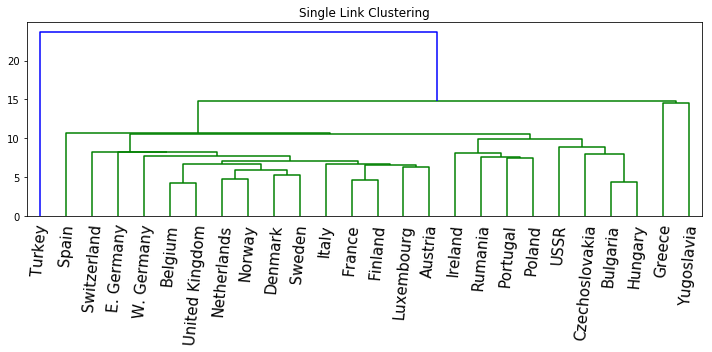

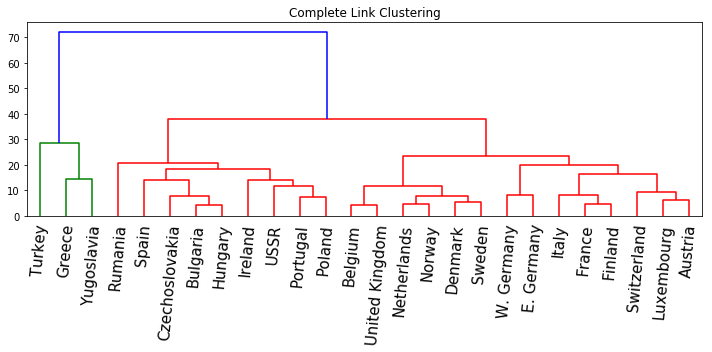

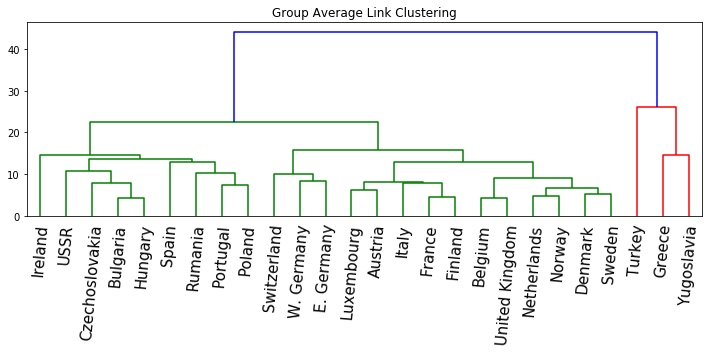

In [10]:
# References - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
# cluster countries using single link, complete link and group average link agglomerative clustering and produce dendrograms 

from scipy.cluster import hierarchy
from matplotlib import pyplot as plt
y = hierarchy.linkage(data_arr,method='single')
fig1 = plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(y,labels=countries,leaf_rotation=85,leaf_font_size=15)
plt.title('Single Link Clustering')
plt.tight_layout()
fig1.savefig('Single.png')

y = hierarchy.linkage(data_arr,method='complete')
fig2 = plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(y,labels=countries,leaf_rotation=85,leaf_font_size=15)
plt.title('Complete Link Clustering')
plt.tight_layout()
fig2.savefig('Complete.png')

y = hierarchy.linkage(data_arr,method='average')
fig3 = plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(y,labels=countries,leaf_rotation=85,leaf_font_size=15)
plt.title('Group Average Link Clustering')
plt.tight_layout()
fig3.savefig('Group.png')

plt.show()

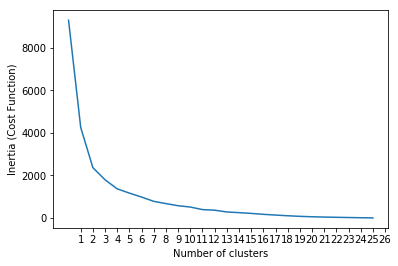

In [29]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans
inertia = []
f = plt.figure()
for num_clusters in range(1,27):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit_predict(features)
    labels = kmeans.labels_
    inertia.append(kmeans.inertia_)
plt.plot(inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Cost Function)')
plt.xticks(range(1,27))
plt.show()
f.savefig('CostFunc_against_k.png')

In [33]:
# Clustering using k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(features)
for i in range(0,len(countries)):
    print(countries[i],kmeans.labels_[i])

Belgium 0
Denmark 0
France 0
W. Germany 0
Ireland 2
Italy 0
Luxembourg 0
Netherlands 0
United Kingdom 0
Austria 0
Finland 0
Greece 1
Norway 0
Portugal 2
Spain 2
Sweden 0
Switzerland 0
Turkey 1
Bulgaria 2
Czechoslovakia 2
E. Germany 0
Hungary 2
Poland 2
Rumania 2
USSR 2
Yugoslavia 1


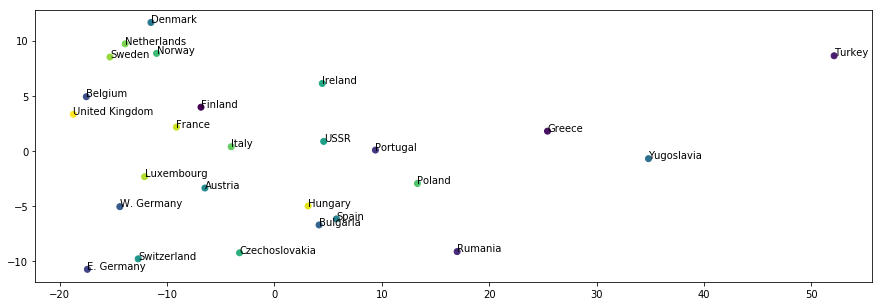

In [30]:
# https://www.dataquest.io/blog/python-vs-r/

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_axes = pca_2.fit_transform(features)
f = plt.figure(figsize=(15,5))
plt.scatter(x=plot_axes[:,0], y=plot_axes[:,1], c=labels)
for i in range (0,len(countries)):
    xy=(plot_axes[i,0],plot_axes[i,1])
    plt.annotate(countries[i],xy)
plt.show()
f.savefig('countries_clusters.png')